<h1> Example CNN </h1>
<p> First, we'll import the 'ML' module, to use its 'Classifier' class, os, </p>
<p> and TQDM, which is a handy pip-installable package that gives us nice loading bars. </p>

In [32]:
import ML, os
from tqdm import tqdm

<h2> Set your paths! </h2>
<p> 'patient_path' points to our 'condition-positive' dataset; in this example it points to spectral data in the 'ref pain' study folder, using the P300 task data, with 500-sample-long contig windows and all channels </p>
<p> 'reference_path' points to a folder containing healthy control data study folders </p>

In [38]:
patient_path = "/wavi/EEGstudies/CANlab/contigs/P300_250_1111111111111111111_2"
reference_path = "/wavi/EEGstudies"

<h3> Instantiate a 'Classifier' Object </h3>
<p> 'Classifier' takes one positional argument, currently either "spectra", "contigs", or "erps" </p>

In [39]:
myclf = ML.Classifier("erps")

<h3> Load Patient (Condition-Positive) Data </h3>

In [40]:
for fname in tqdm(os.listdir(patient_path)):
    myclf.LoadData(patient_path+"/"+fname)

100%|██████████| 6060/6060 [00:09<00:00, 630.33it/s]


<h3> Load Control (Condition-Negative) Data </h3>
<p> using the 'Balance' method of 'Classifier', the dataset will automatically add healthy control data found in the reference folders </p> 

In [41]:
myclf.Balance(reference_path)

<h2> Run 'CNN' method of 'Classifier' </h2>
<p> This method will structure the input classes (in this case, 'Spectra' objects) </p>
<p> Optional parameters include:
    <br>- epochs: (int) default 100, number of training iterations to be run
    <br>- normalize: (None, 'standard', 'minmax') default None, z-score normalize input data (features)
    <br>- plot_ROC: (bool) default 'False', plot sensitivity-specificity curve on validation dataset
    <br>- tt_split: (float) default 0.33, ratio of test samples to train samples
    <br>- learning_rate: (float) default 0.01
    <br>- lr_decay: (bool) default False, whether or not the learning rate should decay adhering to a 0.96 decay rate schedule
</p>

Number of negative outcomes: 3406
Number of positive outcomes: 3389
Total number of subjects: 28
% Positive in all subjects: 0.5
% Negative in all subjects: 0.5
Number of samples in train: 4852
Number of samples in test: 1943
% Positive samples in train: 0.5
% Positive samples in test: 0.49562532166752443
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_30 (Batc multiple                  4         
_________________________________________________________________
conv2d_30 (Conv2D)           multiple                  50        
_________________________________________________________________
max_pooling2d_30 (MaxPooling multiple                  0         
_________________________________________________________________
batch_normalization_31 (Batc multiple                  20        
_________________________________________________________________
conv2d_31 (

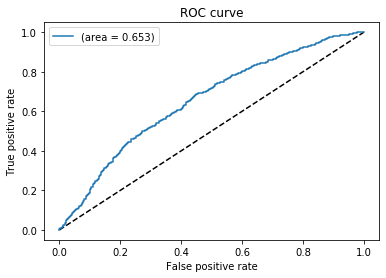

(<tensorflow.python.keras.callbacks.History at 0x7ff178580430>,
 <tensorflow.python.keras.engine.sequential.Sequential at 0x7ff17820b3a0>)

In [42]:
myclf.CNN(learning_rate=0.01, plot_ROC=True)